# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_squared_error,  make_scorer


Загрузка данных

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

Посмотрим на данные в следующем порядке: train, test, full 👀

In [3]:
df_train.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

87 признаков!

Посмотрим на пропуски 👀

In [5]:
df_train.isnull().sum().sort_values(ascending = False)

rougher.output.recovery                               2573
rougher.output.tail_ag                                2250
rougher.output.tail_sol                               2249
rougher.output.tail_au                                2249
secondary_cleaner.output.tail_sol                     1986
                                                      ... 
rougher.calculation.sulfate_to_au_concentrate           27
rougher.calculation.floatbank10_sulfate_to_au_feed      27
rougher.calculation.floatbank11_sulfate_to_au_feed      27
primary_cleaner.input.feed_size                          0
date                                                     0
Length: 87, dtype: int64

In [6]:
df_test.head(5)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


53 признака. Получается, какие-то есть в `train` и их нет в `test`.

In [7]:
df_test.isnull().sum().sort_values(ascending = False)

rougher.input.floatbank11_xanthate            353
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
rougher.input.floatbank10_sulfate             257
primary_cleaner.input.xanthate                166
rougher.input.floatbank10_xanthate            123
rougher.input.feed_sol                         67
rougher.input.floatbank11_sulfate              55
rougher.input.feed_rate                        40
secondary_cleaner.state.floatbank3_a_air       34
secondary_cleaner.state.floatbank2_b_air       23
rougher.input.feed_size                        22
secondary_cleaner.state.floatbank2_a_air       20
rougher.state.floatbank10_e_air                17
rougher.state.floatbank10_d_air                17
rougher.state.floatbank10_a_air                17
rougher.state.floatbank10_b_air                17
rougher.state.floatbank10_c_air                17
rougher.state.floatbank10_f_air                17
primary_cleaner.state.floatbank8_a_air         16


In [8]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [9]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

Тоже 87 признаков. Чуть позже проверим, совпадают ли они с теми, которые заявлены в `train`

In [10]:
df_full.isnull().sum().sort_values(ascending = False)

rougher.output.recovery                     3119
rougher.output.tail_ag                      2737
rougher.output.tail_sol                     2736
rougher.output.tail_au                      2736
rougher.input.floatbank11_xanthate          2257
                                            ... 
primary_cleaner.state.floatbank8_b_level      43
primary_cleaner.state.floatbank8_c_level      43
primary_cleaner.state.floatbank8_d_level      43
primary_cleaner.input.feed_size                0
date                                           0
Length: 87, dtype: int64

### Проверим, что эффективность обогащения рассчитана правильно

Вычислим её на обучающей выборке для признака `rougher.output.recovery`. 

Далее найдем MAE между расчётами и значением признака.

Напомним, что эффективность обогащения расчитывается по следующей формуле:

$$Recovery = \frac{C \times (F-T)}{F \times (C-T)} \times 100\%$$

In [11]:
C = df_train['final.output.concentrate_au']  # C — доля золота в концентрате после флотации/очистки;
F = df_train['rougher.input.feed_au']        # F — доля золота в сырье/концентрате до флотации/очистки;
T = df_train['final.output.tail_au']         # T — доля золота в отвальных хвостах после флотации/очистки.

Recovery = 100 * C * (F - T) / (F*(C - T))

MAE = abs(Recovery - df_train['final.output.recovery']).sum() / len(df_train['final.output.recovery'])
print('MAE of Recovery:', MAE)

MAE of Recovery: 8.863350445046566e-15


Ошибка мала. Это подтверждает, что расчёты в данных произведены верно.

### Проанализируем признаки, недоступные в тестовой выборке

Что это за параметры? К какому типу относятся?

In [12]:
set(df_train.columns) - set(df_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Совпадают ли признаки в `train` и `full`? Если да, то можем заключить, что в `test` недоступны те же самые параметры, как относительно `full`, так и `train`.

In [13]:
set(df_train.columns) == set(df_full.columns)

True

В тестовой выборке отсутвуют следующие параметры:
- параметры продукта `output`
- расчётные характеристики `calculation`
- финальные характеристики `final`


Также в тестовом наборе нет целевых признаков, на то он и тестовый. 

эти сторбцы можно удалить так как признаки на обучающей выборке и тестовой должны совпадать. Но позже.

Сделаем даты индексами!

In [14]:
df_full.set_index('date', inplace=True)
df_train.set_index('date', inplace=True)
df_test.set_index('date', inplace=True)

___
Все признаки, кроме даты – числовые. 

Строки с пропусками в таргете удалим – они могут получить ложный результат при заполнении пропуска и впоследствии помешать при обучении моделей 

Необходимо заполнить пропуски в данных – с помощью `.fillna(method='backfill)`.



In [15]:
df_full['rougher.output.recovery'] = df_full['rougher.output.recovery'].dropna()
df_full['final.output.recovery'] = df_full['final.output.recovery'].dropna()
df_full = df_full.fillna(method='backfill')

df_train['rougher.output.recovery'] = df_train['rougher.output.recovery'].dropna()
df_train['final.output.recovery'] = df_train['final.output.recovery'].dropna()
df_train = df_train.fillna(method='backfill')

df_test = df_test.fillna(method='backfill')

Проверим, остались ли пропущенные значения.

Пронумеруем датасеты `df_train`, `df_test`, `df_full` как 1, 2, 3 соттветсвенно.

In [16]:
df_list = [df_train, df_test, df_full]
counter = 1

for df in df_list :
    if len(df[df.isna().any(axis=1)]) == 0:
        print("There's no more NaN in {} dataset".format(counter))
        print()
    else:
        print("You need to fill NaN values")
    counter+=1

There's no more NaN in 1 dataset

There's no more NaN in 2 dataset

There's no more NaN in 3 dataset



## Вывод:
По результатам рассмотрения датафреймов можно отметить следующие особенности:

В данных есть есть большое количество пропусков.

Столбец с датой имел тип данных object. Но теперь он стал индексом.

В обучающей выборке всего 87 столбцов, в тестовой - 53 (без даты, которая стала индексом – 52). В тестовой выборке отсутствуют значения концентраций веществ на разных этапах очистки сырья.

Для проверки рассчитана эффективность обогащения. Значение средней абсолютной ошибки составило 8.9е-15, что говорит о правильно найденном значении восстановленного золота, т.к. ошибка очень мала.

С помощью `.fillna(method='bfill')` были заполнены пропуски во всех датафрейма. Строки с пропущенными значениями в таргете были удалены.

# 2. Анализ данных

## Анализ концентрации металлов на различных этапах очистки

Признаков очень много, поэтому для начала необходимо выделить те, что содержат названия металлов, а именно

In [17]:
def AgPbAu_cols(data):

    ag = [column for column in data.columns if '_ag' in column] 
    pb = [column for column in data.columns if '_pb' in column]
    au = [column for column in data.columns if '_au' in column]

    return {'ag': ag , 'pb': pb , 'au': au}

Функция, которая будет строить графики распределения металла:

In [18]:
def histogram(data , elem_name):
    plt.figure(figsize = (16,6))
    for a in data.columns:
        ax = sns.distplot(data[a])
    ax.set_title('Концентрация ({}) на разных этапах тех. процесса'.format(elem_name), fontsize = 20)
    ax.grid(True)
    ax.legend(data.columns , fontsize = 14)
    ax.set_xlabel('Concentrate of {} in processes'.format(elem_name),fontsize = 15)
    return plt.show()

Создадим датасеты с самым необходимым о металлах

In [19]:
ag = df_full[AgPbAu_cols(df_full)['ag']]
ag = ag[['rougher.input.feed_ag' ,'rougher.output.concentrate_ag' ,  
         'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag' ]]

pb = df_full[AgPbAu_cols(df_full)['pb']]
pb = pb[['rougher.input.feed_pb' ,'rougher.output.concentrate_pb' ,  
         'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb' ]]

au = df_full[AgPbAu_cols(df_full)['au']]
au = au[['rougher.input.feed_au' ,'rougher.output.concentrate_au' ,  
         'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au' ]]

ag.name = 'Ag'
pb.name = 'Pb'
au.name = 'Au'

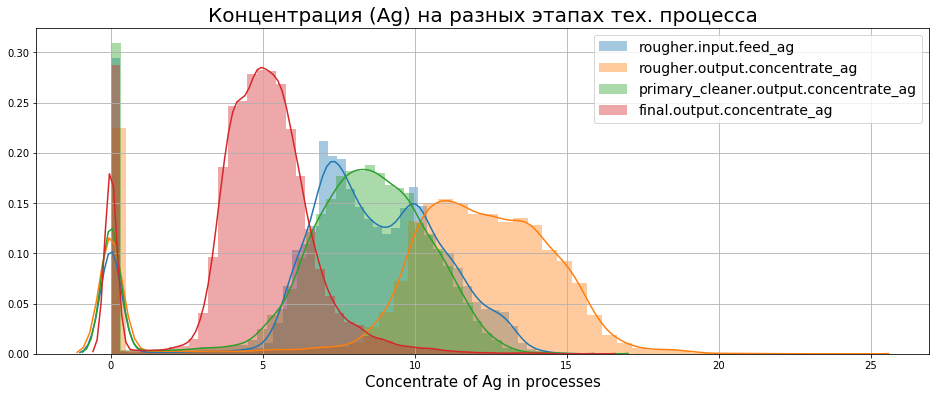

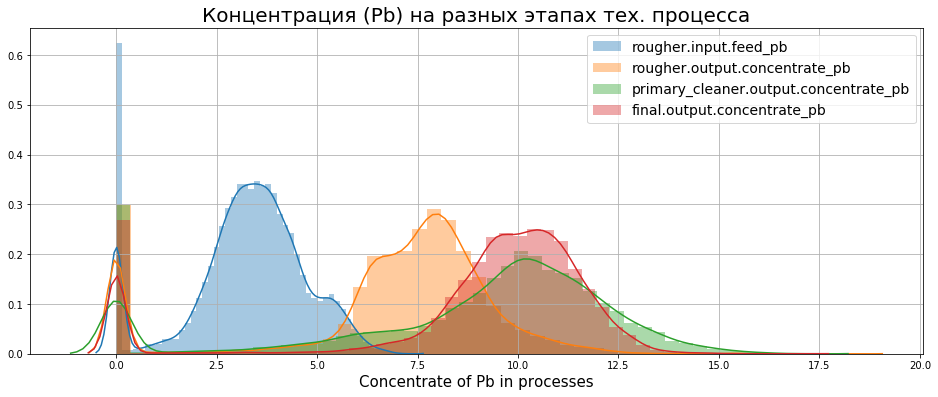

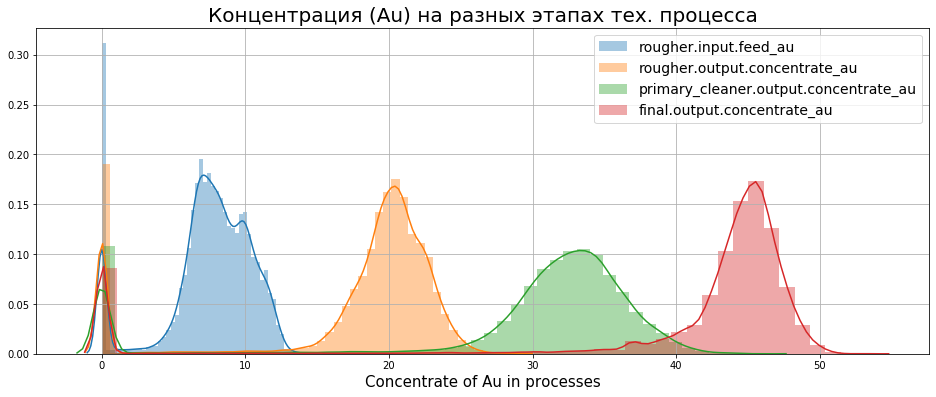

In [20]:
for m in [ag, pb, au]:
    histogram(m, m.name)

Методом библиотеки seaborn построены распределения концентрации металлов в исходном сырье, первой степени очистки и на финальном этапе

Можно отметить следующие особенности:

- в значениях концентрации отмечаются выбросы , большое количество нулевых значений.

- при большей степени очистки концентрация Ag уменьшается.

- концентрация Pb на финальном этапе очистки незначительно увеличивается относительно исходного сырья. Можно предположить, что это вызвано уменьшением концентрации серебра Ag.

- концентрация золота на финальном этапе очистки увеличивается более чем в 2 раза относительно исходного сырья.

## Распределение размера гранул

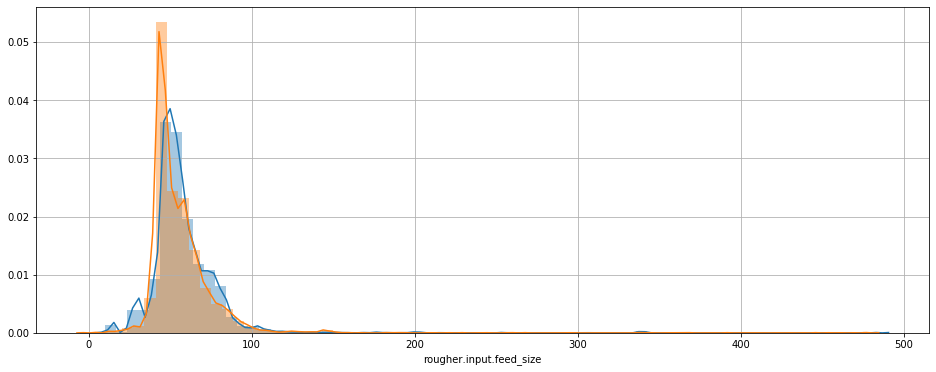

In [21]:
plt.figure(figsize = (16,6))
sns.distplot(df_train['rougher.input.feed_size'] , bins=70)
sns.distplot(df_test['rougher.input.feed_size'],  bins=70)
plt.grid(True)
plt.show()

Что покажет `boxplot`?

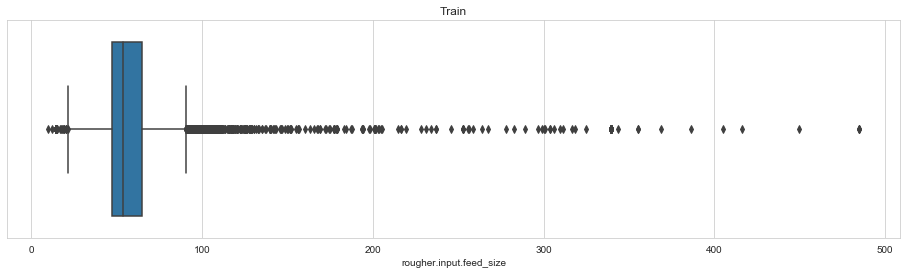

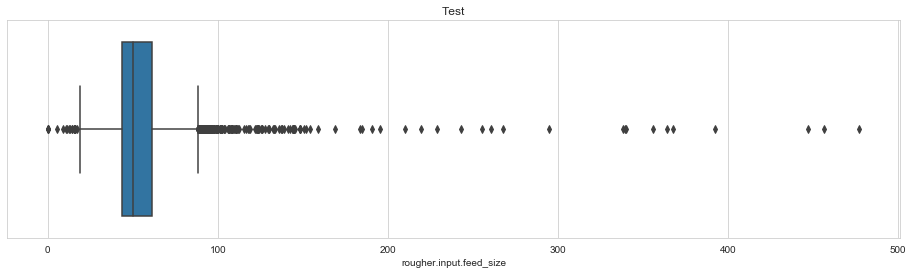

In [22]:
sns.set_style('whitegrid') 
plt.figure(figsize=(16,4))
plt.title('Train')
sns.boxplot(x = 'rougher.input.feed_size', data = df_train)
plt.show()

sns.set_style('whitegrid') 
plt.figure(figsize=(16,4))
plt.title('Test')
sns.boxplot(x = 'rougher.input.feed_size', data = df_test)
plt.show()

Как видно из boxplot данные очень похожи, просто выборка тестовых данных сильо меньше, можно сказать что распределение тестовой выборки стремиться к распределению обучающей выборки.
Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

При сравнении распределений на тестовой и обучающей выборках отмечено следующее:
- распределения схожи и на работу модели незначительные различия не повлияют
- в обоих выборках есть аномальные значения, в том числе отрицательные

## Суммарная концентрация всех веществ на разных стадиях: 
## в сырье, в черновом и финальном концентратах.¶

Функция для построения распределений суммы всех концентратов:

In [23]:
def sum_concetrate_minerals_hist_on_steps(data, step):
    sum_concetrate = data[step+'.output.concentrate_au'] 
    + data[step+'.output.concentrate_ag'] 
    + data[step+'.output.concentrate_pb']
    
    fig= plt.figure(figsize=(16,3))
    ax = sum_concetrate.hist(bins=30)
    ax.set_title('Распределение суммы всех концетратов после этапа {}'.format(step))
    ax.set_xlabel('Концетрат')
    ax.set_ylabel('Количество')
    plt.show()
    return sum_concetrate

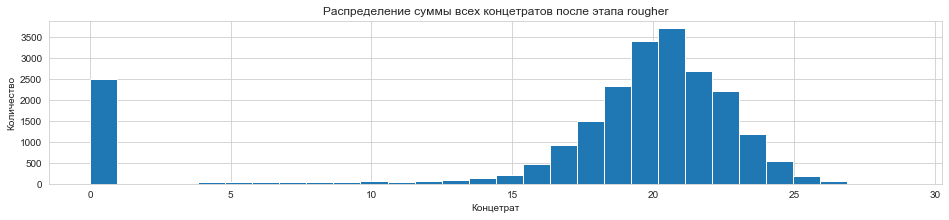

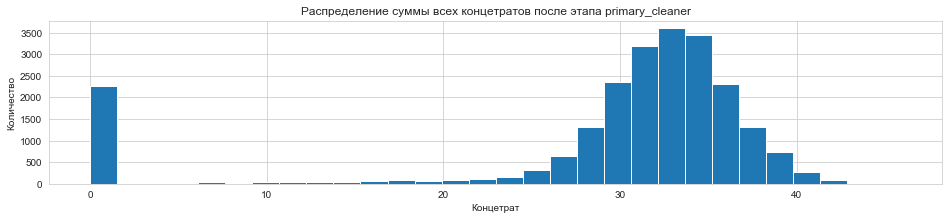

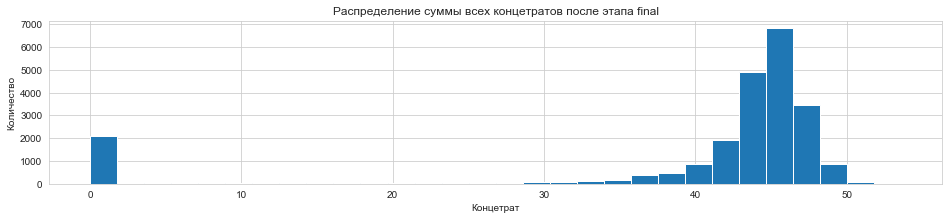

In [24]:
data_with_sum_after_rough = sum_concetrate_minerals_hist_on_steps(df_full, 'rougher')
data_with_sum_after_primary_cleaner = sum_concetrate_minerals_hist_on_steps(df_full, 'primary_cleaner')
data_with_sum_after_secondary_cleaner = sum_concetrate_minerals_hist_on_steps(df_full, 'final')


На гистограммах можно увидеть высокую концетрацию аномальных значений в районе 0. 

Уберем из датасета все аномальные значения которые =< 0.

In [25]:
anomaly_ind_rough = (data_with_sum_after_rough[data_with_sum_after_rough <= 0]).index.tolist()

anomaly_ind_primary_cleaner = (data_with_sum_after_primary_cleaner[
    data_with_sum_after_primary_cleaner <= 0]).index.tolist()

anomaly_ind_secondary_cleaner = (data_with_sum_after_secondary_cleaner[
    data_with_sum_after_primary_cleaner <= 0]).index.tolist()

anomaly_indexes = list(set(anomaly_ind_rough + anomaly_ind_primary_cleaner + anomaly_ind_secondary_cleaner))

print('Размер датасета до чистки: {}'.format(df_full.shape))
df_full = df_full.loc[~df_full.index.isin(anomaly_indexes)]
print('Размер датасета после чистки: {}'.format(df_full.shape))

Размер датасета до чистки: (22716, 86)
Размер датасета после чистки: (20513, 86)


`test` и `train` тоже почистим от нулей: убираем все индексы, которых уже нет в `full`.

In [26]:
print('Размер датасета до чистки: {}'.format(df_train.shape))
df_train = df_train.loc[df_train.index.isin(df_full.index)]
print('Размер датасета после чистки: {}'.format(df_train.shape))
print()
print('Размер датасета до чистки: {}'.format(df_test.shape))
df_test = df_test.loc[df_test.index.isin(df_full.index)]
print('Размер датасета после чистки: {}'.format(df_test.shape))

Размер датасета до чистки: (16860, 86)
Размер датасета после чистки: (15170, 86)

Размер датасета до чистки: (5856, 52)
Размер датасета после чистки: (5343, 52)


Снова посмотрим на распределения суммарной концентрации, уже без нулей

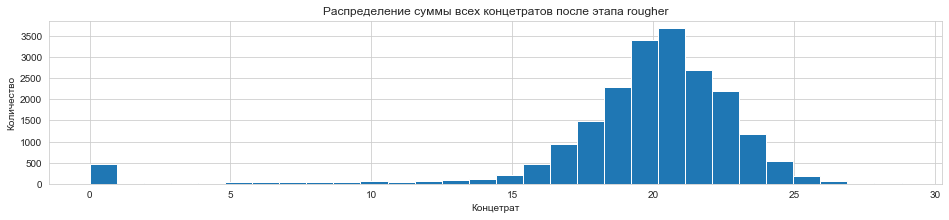

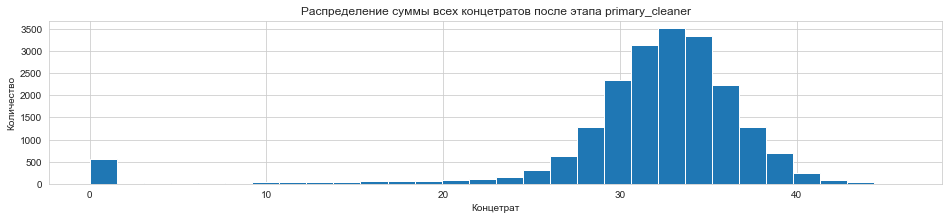

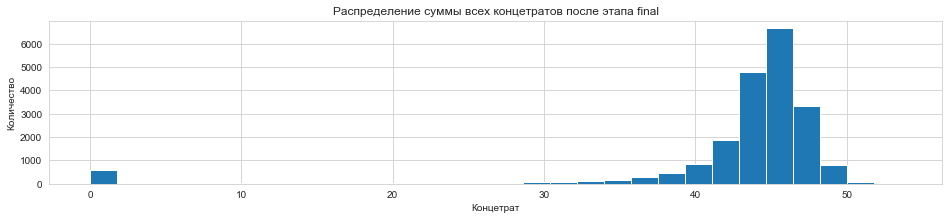

In [27]:
data_with_sum_after_rough = sum_concetrate_minerals_hist_on_steps(df_full, 'rougher')
data_with_sum_after_primary_cleaner = sum_concetrate_minerals_hist_on_steps(df_full, 'primary_cleaner')
data_with_sum_after_secondary_cleaner = sum_concetrate_minerals_hist_on_steps(df_full, 'final')

## Вывод:

Была проделана большая исследовательская работа, в ходе которой были изучены:

- Концетрации основных веществ на разных этапах очистки

- Размер гранул тестовой и обучающей выборки

- Суммарная концентрация веществ

Аномалии (значения =< 0) были удалены. Данные практически готовы к обучению моделей.

# 3. Модель

Выделим из выборок целевые признаки и создадим `features` и `target`

In [28]:
df_test = df_test.join(df_full[['final.output.recovery', 'rougher.output.recovery']])

In [29]:
df_test.shape

(5343, 54)

In [30]:
features_train = df_train.drop(['rougher.output.recovery' , 'final.output.recovery'], axis=1)
target_train = df_train[['rougher.output.recovery' , 'final.output.recovery']]

features_test = df_test.drop(['rougher.output.recovery' , 'final.output.recovery'], axis=1)
target_test = df_test[['rougher.output.recovery' , 'final.output.recovery']]

print('Shape of features_train : {}'.format(features_train.shape))
print('Shape of target_train : {}'.format(target_train.shape))

print('Shape of features_test : {}'.format(features_test.shape))
print('Shape of target_test : {}'.format(target_test.shape))

Shape of features_train : (15170, 84)
Shape of target_train : (15170, 2)
Shape of features_test : (5343, 52)
Shape of target_test : (5343, 2)


Удалим целевые признаки из `features_train`

In [31]:
cols_del = set(features_train.columns) - set(features_test.columns) 
features_train = features_train.drop(cols_del, axis=1)

In [32]:
features_train.shape

(15170, 52)

Отмасштабируем признаки. Самое главное, что я помню: `scaler.fit` делаем на трейне!

In [33]:
numeric = features_train.columns

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Создадим функцию подсчета метрики sMAPE:

$${\displaystyle {\text{sMAPE}}={\frac {1}{N}}\sum _{i=1}^{N}{\frac {\left|y_{i}-\widehat{y}_{i}\right|}{(|y_{i}|+|\widehat{y}_{i}|)/2}\times 100\%}}$$

In [34]:
def sMAPE(target, predictions):
    result = np.abs(target-predictions) / ((np.abs(target) + np.abs(predictions)) / 2)
    total_result = (np.sum(result)) * 100  / target.shape[0]
    final_smape = 0.25 * total_result[0] + 0.75 * total_result[1]
    return final_smape

С помощью `.make_scorer` сделаем sMAPE метрикой в наших моделях. Для дальнейшей кросс валидации зададим количество групп 5.

In [35]:
kf = KFold(n_splits=5, shuffle=True, random_state=2308)

smape_score = make_scorer(sMAPE, greater_is_better=False)

test_score = {}

In [36]:
features_train.shape

(15170, 52)

In [37]:
line_reg_model = LinearRegression().fit(features_train, target_train)
cross_val = (cross_val_score(line_reg_model, 
                                 features_train, 
                                 target_train, 
                                 cv=kf, 
                                 scoring=smape_score
                                )
                  .mean()
                 )
print('Результат LogisticRegression кросс-валидацией:', cross_val)

Результат LogisticRegression кросс-валидацией: -10.113235884639534


In [38]:
predictions_test_LR = line_reg_model.predict(features_test)
smape_LR = sMAPE(target_test, predictions_test_LR)
test_score['LogisticRegression'] = [smape_LR]
print('Результат LogisticRegression на тестовой выборке:', smape_LR)

Результат LogisticRegression на тестовой выборке: 9.975785399740133


In [39]:
for depth in range(1, 25):
    regr =  DecisionTreeRegressor(max_depth=depth).fit(features_train, target_train)
    predictions = regr.predict(features_train)
    scores = cross_val_score(regr, features_train, target_train, cv=kf, scoring=smape_score).mean()   
    print("max_depth =", depth, ":")
    print("Результат на обучающей  выборке", sMAPE(target_train, predictions))
    print("Результат при кросс-валидации", scores)
    print()

max_depth = 1 :
Результат на обучающей  выборке 11.547622751132614
Результат при кросс-валидации -11.548907861109068

max_depth = 2 :
Результат на обучающей  выборке 11.004986343098423
Результат при кросс-валидации -10.882626863395705

max_depth = 3 :
Результат на обучающей  выборке 10.339882847610943
Результат при кросс-валидации -10.266617609652222

max_depth = 4 :
Результат на обучающей  выборке 9.56070369525997
Результат при кросс-валидации -9.71879902959353

max_depth = 5 :
Результат на обучающей  выборке 9.152226341087932
Результат при кросс-валидации -9.370232628085724

max_depth = 6 :
Результат на обучающей  выборке 8.691020676736734
Результат при кросс-валидации -9.15717257505554

max_depth = 7 :
Результат на обучающей  выборке 8.163934101417839
Результат при кросс-валидации -8.955510723038696

max_depth = 8 :
Результат на обучающей  выборке 7.720779283301149
Результат при кросс-валидации -8.779813146586509

max_depth = 9 :
Результат на обучающей  выборке 7.16246337793368
Резу

In [40]:
parameters = {'max_depth': range(5, 25)}
gs = GridSearchCV(DecisionTreeRegressor(random_state=12345), 
                  parameters,
                  cv=kf,
                  scoring=smape_score)
gs.fit(features_train, target_train)
gs.best_params_

{'max_depth': 12}

In [41]:
gs.best_score_

-8.558153810873076

In [42]:
regr =  DecisionTreeRegressor(max_depth=12).fit(features_train, target_train)
cross_val = (cross_val_score(regr, 
                                 features_train, 
                                 target_train, 
                                 cv=kf, 
                                 scoring=smape_score
                                )
                  .mean()
                 )
print('Результат кросс-валидацией:', cross_val)

Результат кросс-валидацией: -8.586059907184424


In [43]:
predictions_test_DT = regr.predict(features_test)
smape_DT = sMAPE(target_test, predictions_test_DT)
test_score['DecisionTreeRegressor'] = [smape_DT]
print('Результат модели на тестовой выборке:',smape_DT)

Результат модели на тестовой выборке: 11.895438567332878


Попробуем модель Дамми-регрессора. На самом деле, это **константная модель**. Выбираем способ считать по медиане, тогда `pred` – это будет, по идее, медиана тестовой выборки

In [44]:
dummy_regr = DummyRegressor(strategy="median")
dummy_regr.fit(features_train, target_train)
pred = dummy_regr.predict(features_test)
sMAPE(target_test, pred)

9.513168511088239

Ради интереса попробуем регрессию Ridge


In [45]:
for coef in range(100, 7500, 500):
    model = Ridge(alpha=coef, solver='sparse_cg').fit(features_train, target_train)
    predictions = model.predict(features_train)
    scores = cross_val_score(model, features_train, target_train, cv=kf, scoring=smape_score).mean()   
    print("alpha =", coef, ":")
    print("Результат на обучающей  выборке", sMAPE(target_train, predictions))
    print("Результат при кросс-валидации", scores)
    print()

alpha = 100 :
Результат на обучающей  выборке 10.03945046978024
Результат при кросс-валидации -10.089032582805746

alpha = 600 :
Результат на обучающей  выборке 10.05263094846291
Результат при кросс-валидации -10.098558233272941

alpha = 1100 :
Результат на обучающей  выборке 10.082726790442662
Результат при кросс-валидации -10.131278733991985

alpha = 1600 :
Результат на обучающей  выборке 10.114562226843411
Результат при кросс-валидации -10.16705559598812

alpha = 2100 :
Результат на обучающей  выборке 10.145971168504618
Результат при кросс-валидации -10.202620338508797

alpha = 2600 :
Результат на обучающей  выборке 10.175701559478185
Результат при кросс-валидации -10.23750578270953

alpha = 3100 :
Результат на обучающей  выборке 10.205267141737401
Результат при кросс-валидации -10.269855663748384

alpha = 3600 :
Результат на обучающей  выборке 10.2332427860377
Результат при кросс-валидации -10.300358659683573

alpha = 4100 :
Результат на обучающей  выборке 10.259464297514787
Резуль

In [46]:
model = Ridge(alpha=100, solver='sparse_cg').fit(features_train, target_train)
cross_val = (cross_val_score(model, 
                                 features_train, 
                                 target_train, 
                                 cv=kf, 
                                 scoring=smape_score
                                )
                  .mean()
                 )
predicted = model.predict(features_test)

print('Результат кросс-валидацией:', cross_val)
print('Результат на тестовой выборке:', sMAPE(target_test, predicted))

Результат кросс-валидацией: -10.089032582805746
Результат на тестовой выборке: 9.74643454234769


Однако, при увеличении $\alpha$ sMAPE на тесте падает:

In [47]:
for coef in range(100, 7500, 500):
    model = Ridge(alpha=coef, solver='sparse_cg')
    model.fit(features_train, target_train)
    predicted = model.predict(features_test)
    print('alpha = ', coef, 'sMAPE = ', sMAPE(target_test, predicted))

alpha =  100 sMAPE =  9.74643454234769
alpha =  600 sMAPE =  9.426753827969547
alpha =  1100 sMAPE =  9.308162484178464
alpha =  1600 sMAPE =  9.235092036608854
alpha =  2100 sMAPE =  9.188499696428998
alpha =  2600 sMAPE =  9.154808961960365
alpha =  3100 sMAPE =  9.130912584001106
alpha =  3600 sMAPE =  9.113120517071849
alpha =  4100 sMAPE =  9.100760961655672
alpha =  4600 sMAPE =  9.090049504465606
alpha =  5100 sMAPE =  9.08237198520052
alpha =  5600 sMAPE =  9.077441717132377
alpha =  6100 sMAPE =  9.07240256266944
alpha =  6600 sMAPE =  9.068836963663387
alpha =  7100 sMAPE =  9.066404473279876


Пока что это лучшее значение метрики sMAPE при $\alpha > 600$ 
___

## Вывод:

Была написана функция для вычисления метрики sMAPE. Признаки были отмасштабированы и разделены на features и target.

Модели логистической регрессии и решающего дерева были изучены на качество с помощью методов кросс-валидации и поиска гипер параметром GridSearchCV.

Так же была опробована линейная модель Ridge. Её значения sMAPE на тестовой выборке самые низкие.

Сначала результат кажется нормальным, однако после проверки константной модели (Dummy Regressor) становится ясно, что по sMAPE она ничуть не хуже построенных ранее моделей.

Однако, ближе всего к её значениям на тестовой выборке подобралась модель Ridge – её будем считать лучшей.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
    - [x]  Проанализированы и обработаны аномальные значения
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке